### Step 1: Importing Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
# import boto3

### Step 2: Importing Data from S3

In [3]:
# Importing dataset from S3 bucket

# Read Hive Output for EDA
df = pd.read_csv('s3://group4project1/Processed/000000_0-hadoop_20250408185504_01004c5b-6827-41c4-bd1e-23151ae8b9d5-1', header=None)

# List of columns to convert
columns = ['std_id', 'cgpa', 'internship', 'project', 'certification', 'testscore', 
           'softskillsrating', 'extra', 'placement', 'ssc', 'hsc', 'placementstatus']


df.columns = columns

In [5]:
print(df.columns)

Index(['std_id', 'cgpa', 'internship', 'project', 'certification', 'testscore',
       'softskillsrating', 'extra', 'placement', 'ssc', 'hsc',
       'placementstatus'],
      dtype='object')


In [7]:
# Convert each to numeric (float or int)
for col in columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [9]:
df.dtypes

std_id              float64
cgpa                float64
internship          float64
project             float64
certification       float64
testscore           float64
softskillsrating    float64
extra                 int64
placement             int64
ssc                 float64
hsc                 float64
placementstatus       int64
dtype: object

In [11]:
df.head()

,std_id,cgpa,internship,project,certification,testscore,softskillsrating,extra,placement,ssc,hsc,placementstatus
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,0
1,1.0,7.5,1.0,1.0,1.0,65.0,4.4,0,0,61.0,79.0,0
2,2.0,8.9,0.0,3.0,2.0,90.0,4.0,1,1,78.0,82.0,1
3,3.0,7.3,1.0,2.0,2.0,82.0,4.8,1,0,79.0,80.0,0
4,4.0,7.5,1.0,1.0,2.0,85.0,4.4,1,1,81.0,80.0,1


In [13]:
df.dropna(inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   std_id            10000 non-null  float64
 1   cgpa              10000 non-null  float64
 2   internship        10000 non-null  float64
 3   project           10000 non-null  float64
 4   certification     10000 non-null  float64
 5   testscore         10000 non-null  float64
 6   softskillsrating  10000 non-null  float64
 7   extra             10000 non-null  int64  
 8   placement         10000 non-null  int64  
 9   ssc               10000 non-null  float64
 10  hsc               10000 non-null  float64
 11  placementstatus   10000 non-null  int64  
dtypes: float64(9), int64(3)
memory usage: 1015.6 KB


In [16]:
# # Upload images to S3 using boto3

# # Create an S3 client
# s3 = boto3.client('s3')

# bucket_name = 'group4project1'
# s3_key = 'Visualizations/numerical_attributes_histplot.png'

### Step 3: Perform EDA

#### 1. Histogram

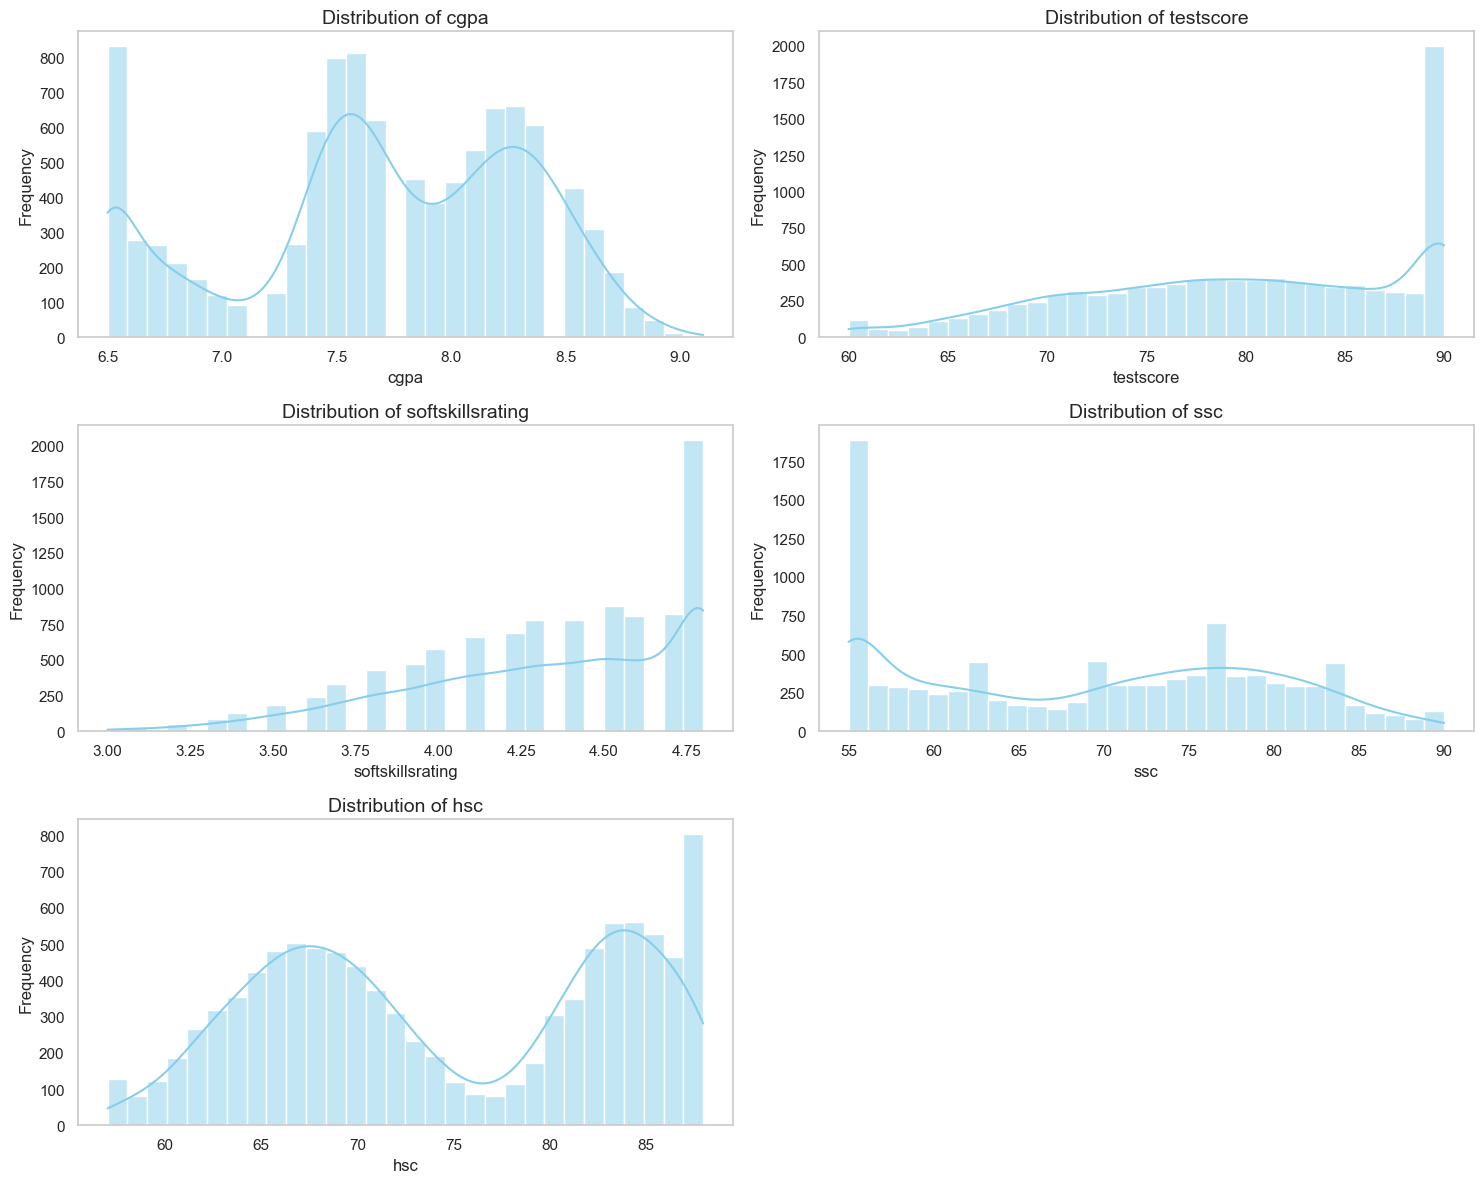

In [17]:
# Histograms for Essential Numerical Attributes

sns.set(style="whitegrid")

# List of features
features = ['cgpa', 'testscore', 'softskillsrating', 'ssc', 'hsc']

# Plot all histograms
plt.figure(figsize=(15, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid()

plt.tight_layout()

# Save locally
plt.savefig('numerical_attributes_histplot.png', dpi=300, bbox_inches='tight')
plt.show()


In [18]:
# # Upload above visualization

# s3.upload_file('numerical_attributes_histplot.png', bucket_name, s3_key)

#### 2. Count PLot

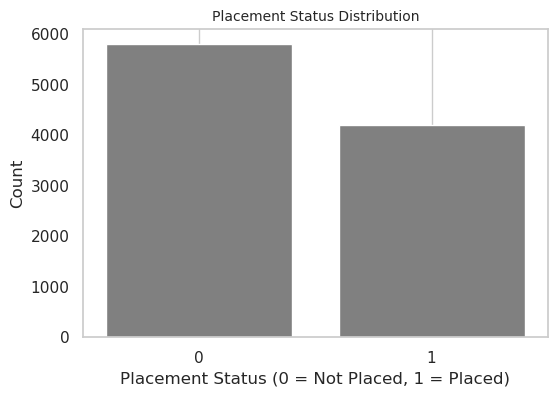

In [20]:
# Bar Plot for Placement Status

plt.figure(figsize=(6,4))
sns.countplot(x='placementstatus', data=df, color='grey')
plt.title('Placement Status Distribution', fontsize=10)
plt.xlabel('Placement Status (0 = Not Placed, 1 = Placed)')
plt.ylabel('Count')
plt.grid()

# Save locally
plt.savefig('count_placementStatus.png', dpi=300, bbox_inches='tight')
plt.show()

In [21]:
# Define key 
s3_key = 'Visualizations/count_placementStatus.png'

s3.upload_file('count_placementStatus.png', bucket_name, s3_key)

#### 3. Box plot

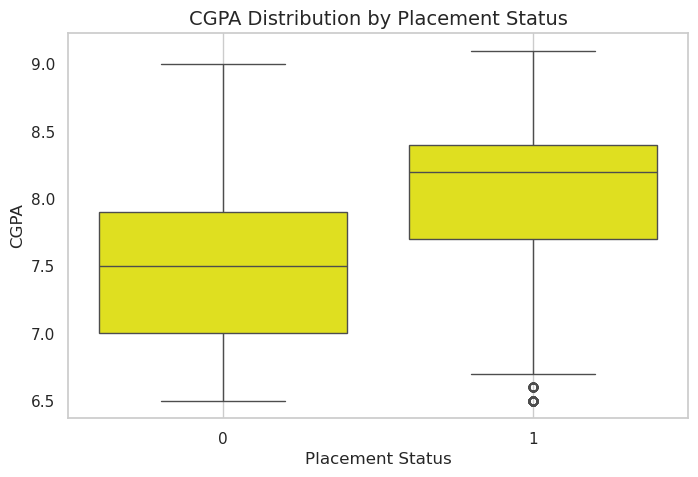

In [23]:
# Box Plot: CGPA vs Placement Status

plt.figure(figsize=(8,5))
sns.boxplot(x='placementstatus', y='cgpa', data=df, color='yellow')
plt.title('CGPA Distribution by Placement Status', fontsize=14)
plt.xlabel('Placement Status')
plt.ylabel('CGPA')
plt.grid()

# Save locally
plt.savefig('Box_Plot_CGPAvsPlactSt.png', dpi=300, bbox_inches='tight')
plt.show()


In [24]:
# Define key 
s3_key = 'Visualizations/Box_Plot_CGPAvsPlactSt.png'

s3.upload_file('Box_Plot_CGPAvsPlactSt.png', bucket_name, s3_key)

#### 4. HeatMap

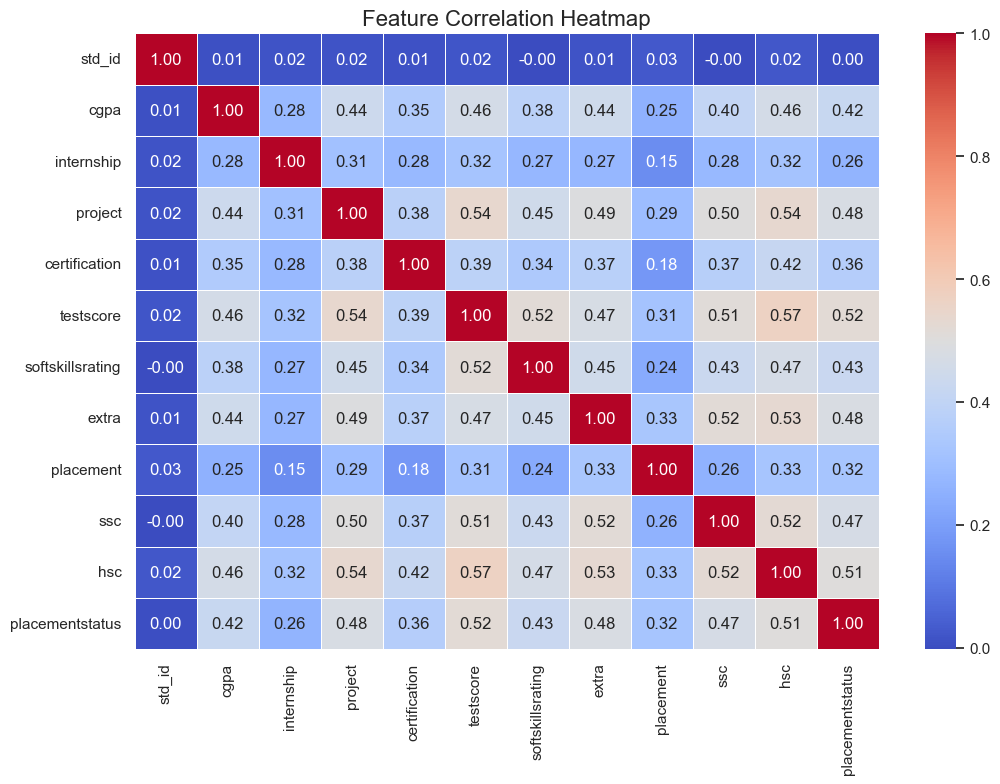

In [19]:
# Compute correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=16)

# Save locally
plt.savefig('Correlation_Matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [29]:
# Define key 
s3_key = 'Visualizations/Correlation_Matrix.png'

s3.upload_file('Correlation_Matrix.png', bucket_name, s3_key)

#### 5. Pairplot

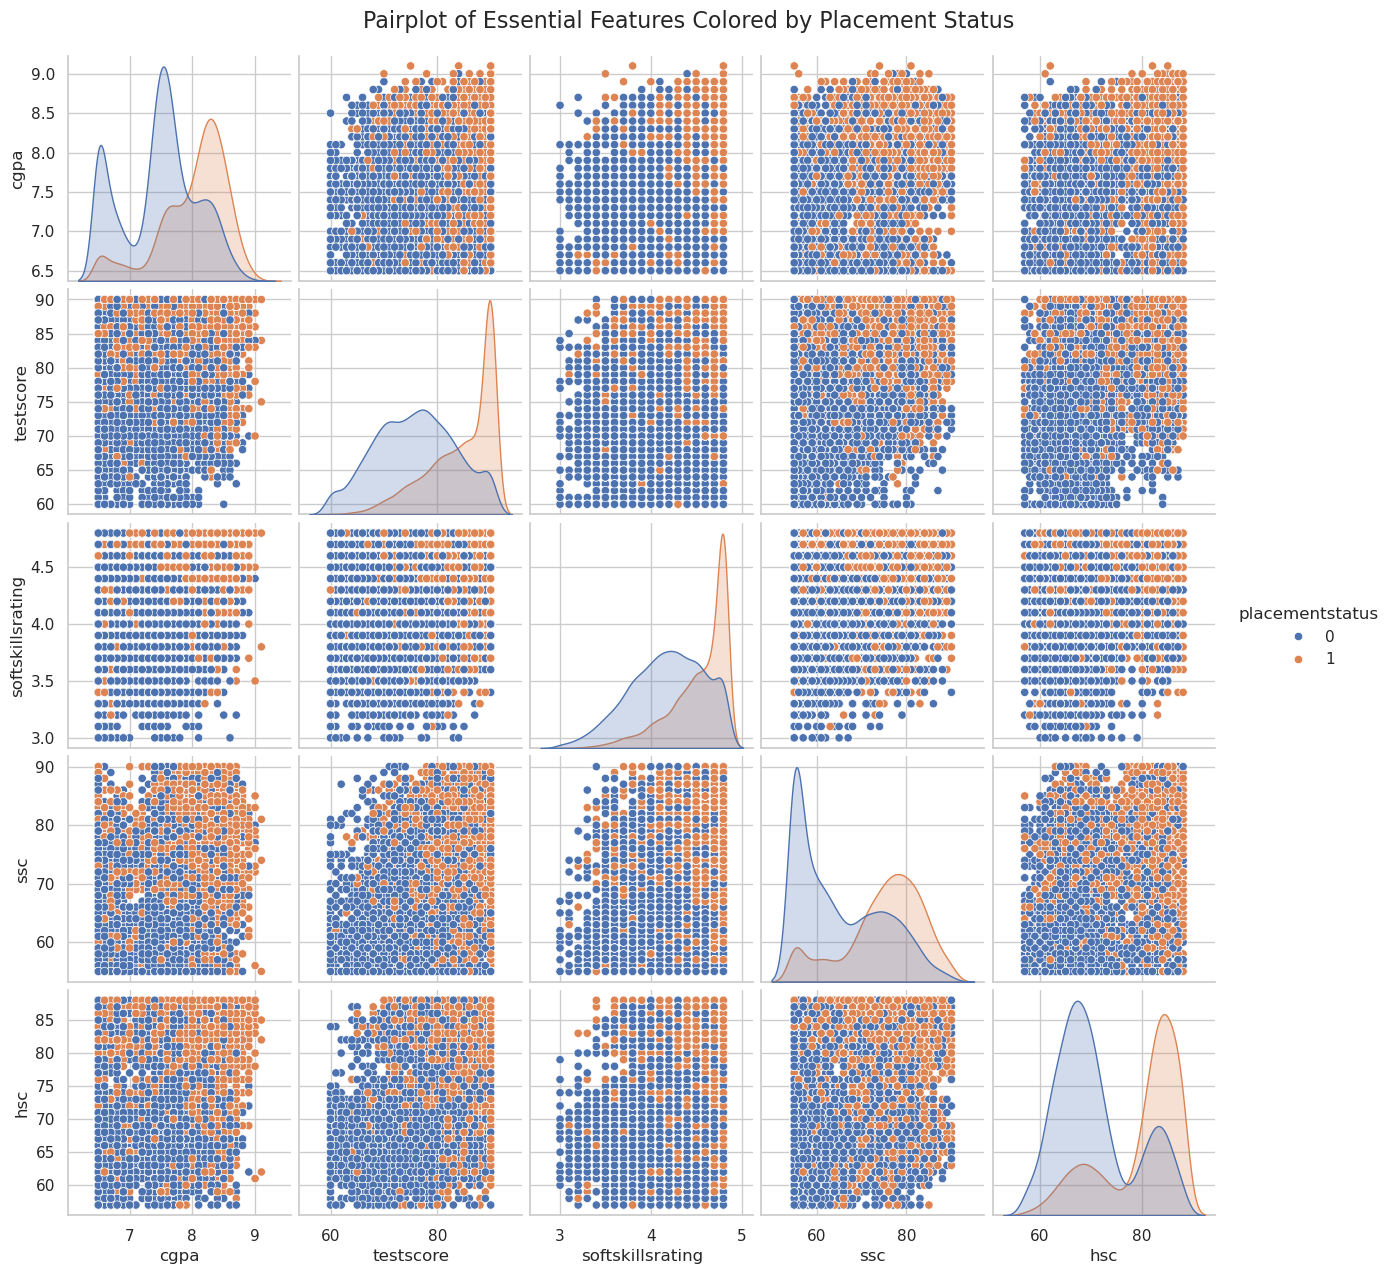

In [31]:
# Pair plot of selected features
pairplot_features = ['cgpa', 'testscore', 'softskillsrating', 'ssc', 'hsc']

sns.pairplot(df[pairplot_features + ['placementstatus']], hue='placementstatus', height=2.5)
plt.suptitle('Pairplot of Essential Features Colored by Placement Status', y=1.02, fontsize=16)

# Save locally
plt.savefig('Pair_Plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [32]:
# Define key 
s3_key = 'Visualizations/Pair_Plot.png'

s3.upload_file('Pair_Plot.png', bucket_name, s3_key)

#### 6. Bar Plot

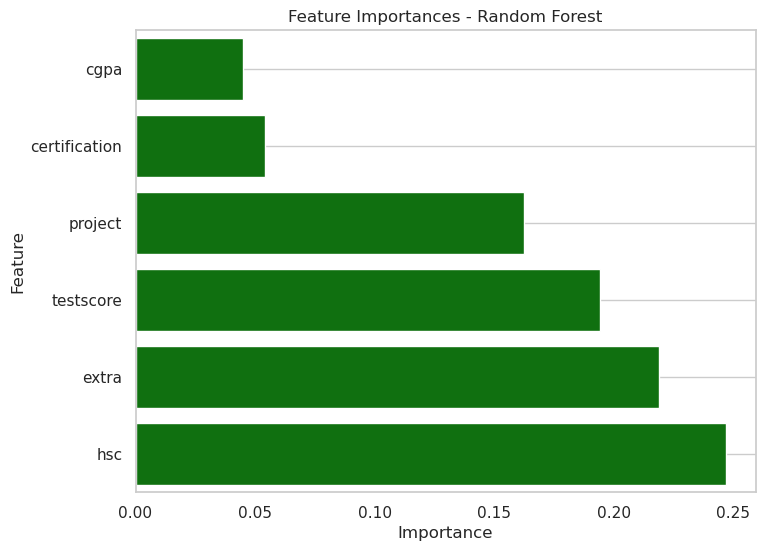

In [33]:
# Feature importance

features = ["cgpa", "certification", "project", "testscore", "extra", "hsc"]
importances = [0.0449, 0.0541,  0.1626, 0.1944, 0.2190, 0.2469]  

plt.figure(figsize=(8,6))
sns.barplot(x=importances, y=features, orient='h', color='green')
plt.title('Feature Importances - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid()

# Save locally
plt.savefig('Feature_Importance_BarPlot.png', dpi=300, bbox_inches='tight')
plt.show()

In [34]:
# Define key 
s3_key = 'Visualizations/Feature_Importance_BarPlot.png'

s3.upload_file('Feature_Importance_BarPlot.png', bucket_name, s3_key)

### Step 4:  Visualization for Model Performance and Evaluation

In [37]:
# Load Models Prediction from S3 bucket
dt_preds = pd.read_csv('s3://group4project1/Predictions/DecisionTree/part-00000-9df4c22d-8255-420f-bbc7-166b9d8d8660-c000.csv')
rf_preds = pd.read_csv('s3://group4project1/Predictions/RandomForest/part-00000-40f3906d-7bc1-4144-a5aa-83a8e3560489-c000.csv')
lr_preds = pd.read_csv('s3://group4project1/Predictions/LogisticRegression/part-00000-0e0c7b40-be0e-48e6-8d1b-4962c959bf47-c000.csv')


#### 7. Confusion Matrix

In [38]:
# Confusion Matrix for Each Model
# Define a plot function
def plot_confusion_matrix(y_true, y_pred, model_name, color):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=color)
    plt.title(f'Confusion Matrix: {model_name}')
    plt.grid(False)
    # Save locally
    plt.savefig(f"{model_name}_confusion_matrix", dpi=300, bbox_inches='tight')
    plt.show()

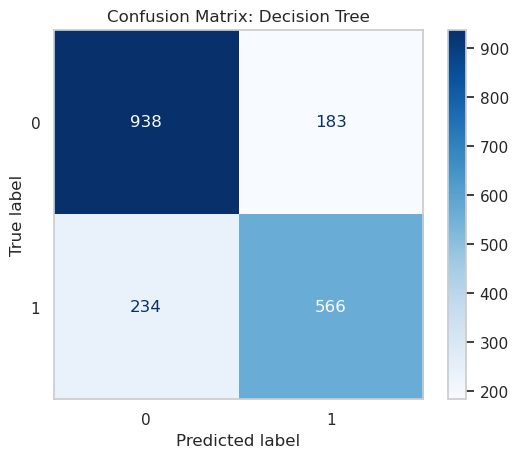

In [39]:
# Plot for Decision Tree
plot_confusion_matrix(dt_preds['placementstatus'], dt_preds['prediction'], "Decision Tree", 'Blues')


In [40]:
# Define key 
s3_key = 'Visualizations/Decision Tree_confusion_matrix.png'

s3.upload_file('Decision Tree_confusion_matrix.png', bucket_name, s3_key)

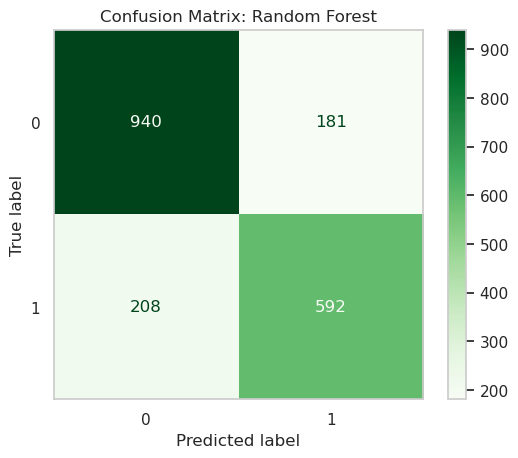

In [41]:
# Plot for Random Forest
plot_confusion_matrix(rf_preds['placementstatus'], rf_preds['prediction'], "Random Forest", 'Greens')

In [42]:
# Define key 
s3_key = 'Visualizations/Random Forest_confusion_matrix.png'

s3.upload_file('Random Forest_confusion_matrix.png', bucket_name, s3_key)

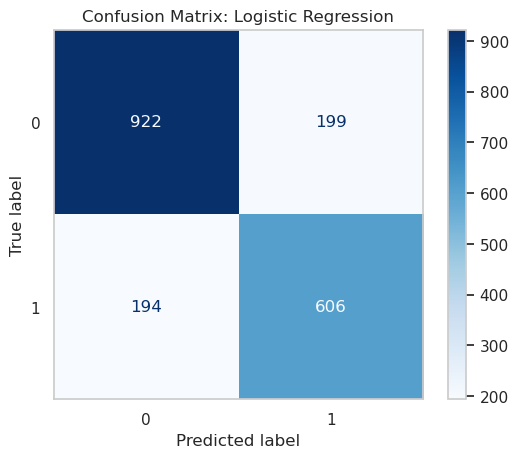

In [43]:
# Plot for Logistic Regression
plot_confusion_matrix(lr_preds['placementstatus'], lr_preds['prediction'], "Logistic Regression", 'Blues')

In [44]:
# Define key 
s3_key = 'Visualizations/Logistic Regression_confusion_matrix.png'

s3.upload_file('Logistic Regression_confusion_matrix.png', bucket_name, s3_key)

#### 8. Bar Plot with Comparison

In [46]:
#  Model Performance Metrics Comparison
# Load model evaluation metrics
metrics_df = pd.read_csv('s3://group4project1/EvaluationResults/model_evaluation_results.csv')

# Display table
print(metrics_df)


                 Model       AUC  Accuracy  Precision    Recall  F1 Score
0        Decision Tree  0.616365  0.782926   0.781740  0.782926  0.781766
1        Random Forest  0.864834  0.797501   0.796757  0.797501  0.796968
2  Logistic Regression  0.865807  0.795419   0.795610  0.795419  0.795509


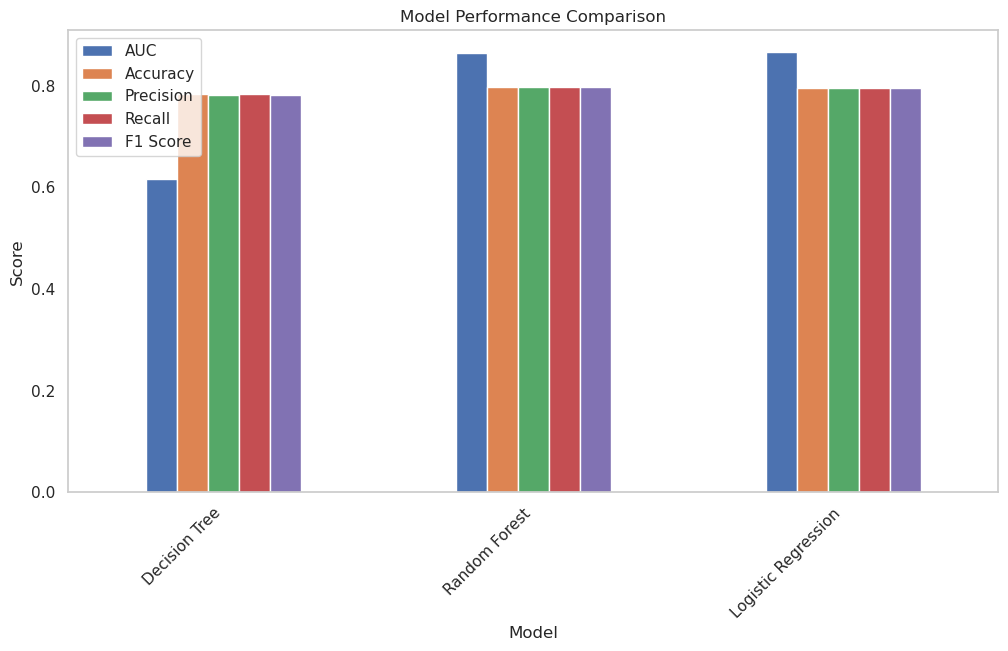

In [47]:
# Bar plot to compare AUC, Accuracy, and F1 Score
metrics_df.plot(x='Model', y=['AUC', 'Accuracy', 'Precision', 'Recall', 'F1 Score'], kind='bar', figsize=(12,6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.legend(loc='best')

# Save locally
plt.savefig("Models_Performnce_BarPlot.png", dpi=300, bbox_inches='tight')
plt.show()

In [48]:
# Define key 
s3_key = 'Visualizations/Models_Performnce_BarPlot.png'

s3.upload_file('Models_Performnce_BarPlot.png', bucket_name, s3_key)

#### 9. Bar Plot for Predicted Result

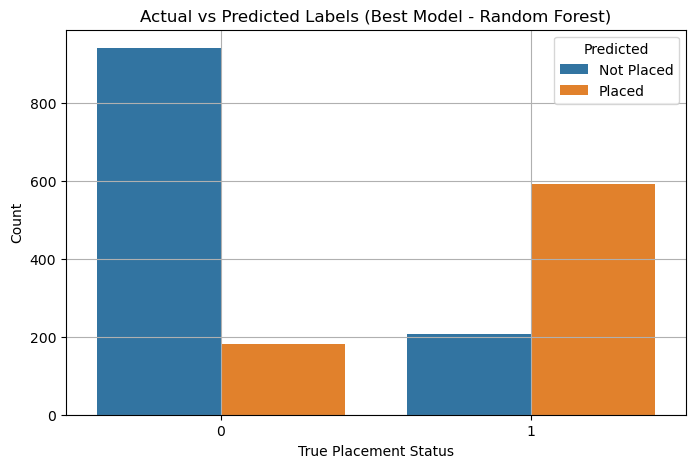

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(x=rf_preds['placementstatus'], hue=rf_preds['prediction'])
plt.title('Actual vs Predicted Labels (Best Model - Random Forest)')
plt.xlabel('True Placement Status')
plt.ylabel('Count')
plt.legend (title='Predicted', labels=['Not Placed', 'Placed'])
plt.grid()

# Save locally
plt.savefig("Models_Performnce_BarPlot.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Define key 
s3_key = 'Visualizations/Models_Performnce_BarPlot.png'

s3.upload_file('Models_Performnce_BarPlot.png', bucket_name, s3_key)